# Advanced Visualization
- belajar library visualisasi dengan tambahan yang berbasis Matplotlib yaitu library seaborn

- mengimport  modul primer

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

- mengimport data yang digunakan dengan metode pandas 'read_excel()'

In [2]:
df_can= pd.read_excel('Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows = range(20),
    skipfooter=2)

- membaca 5 data teratas pada data

In [3]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

- untuk mengetahui ukuran data yang kita gunakan

In [4]:
print(df_can.shape)

(195, 43)


- membersihkan data yang tidak kita gunakan untuk mempermudah visualisasi dengan .drop()
- mengganti nama kolom yang sesuai dengan yang kita inginkan untuk mempermudah visualisasi dengan '.rename(columns={}, inplace=True)' . Penggunaan inplace untuk perubahan permanen pada data yang kita punya
- membuat type column yang kita gunakan merupakan tipe str dengan 'dataname.columns=list(map(str, dataname.columns))
- menambahkan data pada kolom dengan 'dataname['kolom1'] = ....'
- mengelompokan data kolom dengan list tertentu dengan datanew = list()
- index di set dengan data yang mudah untuk kita gunakan untuk mengindex dengan '.set_index()'

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continrnt', 'RegName': 'Region'}, inplace=True)
df_can.columns=list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total']=df_can.sum(axis=1)
years=list(map(str, range(1980,2014)))

/tmp/ipykernel_22000/1165657192.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


In [6]:
df_can.shape

(195, 38)

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

In [8]:
print('Matplotlib version :', mpl.__version__)

Matplotlib version : 3.4.3


### Waffle Chart
- visualisasi yang biasanya dibuat untuk menampilkan progress menuju suatu target
- seperti dasbor excel

## IMIGRAN DENMARK, NORWAY, DAN SWEDEN

- membuat dataframe yang baru dengan data 3 negara yaitu denmark, norway dan swedia

In [9]:
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dns

Continrnt           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

- untuk membuat data waffle perlu untuk menentukan proporsi setiap kategori yang berhubungan dengan nilai totalnya

In [10]:
total_values = sum(df_dns['Total'])
category_proportions = [(float(value) / total_values) for value in df_dns['Total']]

for i, proportions in enumerate(category_proportions):
    print(df_dns.index.values[i]+ ': ' + str(proportions))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


- menentukan ukuran dari keselurhan waffle chart

In [11]:
width = 40
height = 10
total_num_tiles= width*height
print('Toatal number of tiles is: ', total_num_tiles)

Toatal number of tiles is:  400


- menggunakan proporsi setiap kategori untuk menentukan jumlah ubin dari masing-masing kategori

In [12]:
tiles_per_category=[round(proportion*total_num_tiles) for proportion in category_proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dns.index.values[i]+ ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


- membuat matriks yang menyerupai wafel dan mengiisinya

In [14]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range (height):
        tile_index += 1

        if tile_index > sum (tiles_per_category[0: category_index]):
            category_index +=1

        waffle_chart[row, col]=category_index
print('Waffle chart populated!')

Waffle chart populated!


- matriks waffle

In [15]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

- memetakan matriks menjadi visual waffle chart

<Figure size 432x288 with 0 Axes>

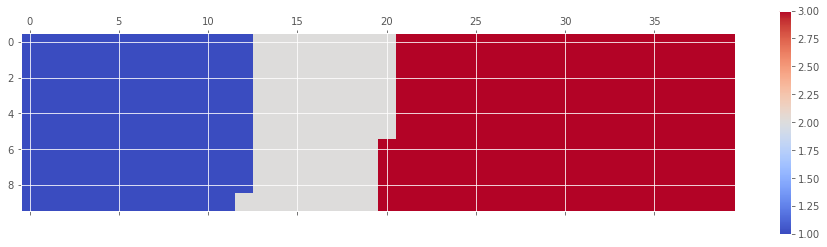

In [16]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

- waffle chart dapat ditingkatkan nilai estetikanya

([], [])

<Figure size 432x288 with 0 Axes>

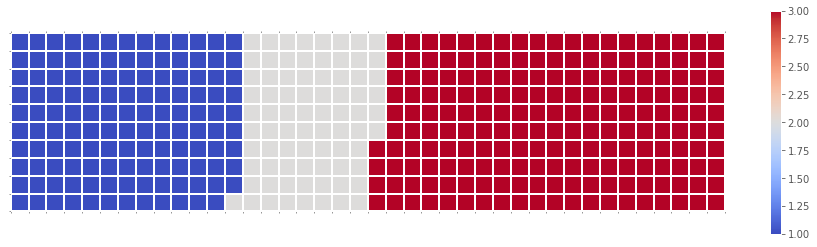

In [17]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

- perlu ditambahkan legenda

<Figure size 432x288 with 0 Axes>

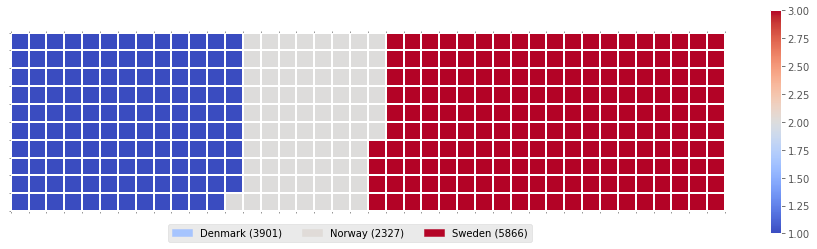

In [21]:
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

value_cumsum = np.cumsum(df_dns['Total'])
total_values = value_cumsum[len(value_cumsum)-1]

legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(value_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles= legend_handles, loc='lower center', ncol=len(df_dns.index.values),bbox_to_anchor=(0., -0.2, 0.95, .1))

- karena diperlukan banyak langkah untuk membuat waffle chart maka diperlukan untuk menggabungkan semua langkah menjadi satu fungsi yang disebut create_waffle_chart

In [22]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [26]:
df_dsn=df_dns

In [27]:
width = 40
height = 10
categories = df_dns.index.values
values= df_dns['Total']
colormap=plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

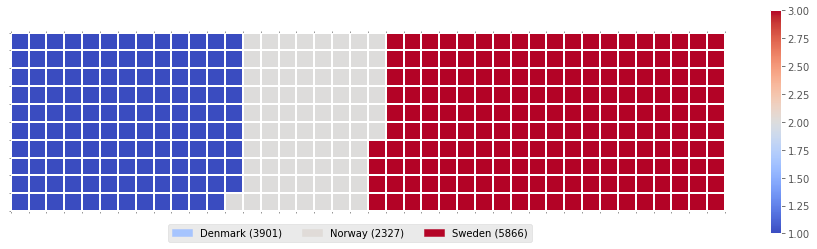

In [28]:
create_waffle_chart(categories, values, height, width, colormap)